In [1]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
import csv

warnings.filterwarnings("ignore",message='invalid value encountered in less_equal')

%matplotlib inline

In [22]:
figSavePath = '/Users/danstechman/GoogleDrive/School/Research/PECAN/Microphysics/plots/vertical_profiles/ZoneCmp'
fType = 'pdf'

excldOutliers = True

if excldOutliers:
    npSaveFname = '/Users/danstechman/GoogleDrive/PECAN-Data/mp-data/allSpirals_excldOutlrs_stats.npz'
else:
    npSaveFname = '/Users/danstechman/GoogleDrive/PECAN-Data/mp-data/allSpirals_stats.npz'

saveNP     = True
noDispSave = True

plotRH   = False
plotNt   = False
plotTWC  = False
plotDmm  = False
plotARat = False
plotRE   = False
plotRjcR = False
plotLmda = True

plotTZsep = True

# Define temp bin interval
binIntvl = 1.0

if not excldOutliers:
    flights = ['20150617','20150620','20150701','20150702','20150706','20150709']
else:
    flights = ['20150617','20150620','20150701','20150706','20150709']
#     flights = ['20150620','20150701','20150706','20150709']

tzFill = 'darkkhaki'
tzLine = '#5F5B36'
esrFill = 'mediumslateblue'
esrLine = '#3D3477'
arFill = 'darkcyan'
arLine = '#005757'

if not os.path.exists(figSavePath):
    os.makedirs(figSavePath)

### Import data and assign into MCS zone dictionaries
This is where we could create alternative sorting schemes as well _(i.e., perhaps we only want to sort data from trailing stratiform spirals into these MCS zone dictionaries)_

In [4]:
# Initialize dictionaries to hold each concatenated variable within each of the 3 regions
tz = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': [],'lmda': []}
tzUFO4_S1 = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': [],'lmda': []}
tzUFO4_S2 = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': [],'lmda': []}
sr = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': [],'lmda': []}
ar = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': [],'lmda': []}
pf1 = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': [],'lmda': []}
pf2 = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': [],'lmda': []}
iop11S2 = {'tempC': [],'rh': [],'Nt': [],'twc': [],'Dmm': [],'ar': [],'re': [],'rjctRatio': [],'lmda': []}

totalCount = 0
tzCount = 0
esrCount = 0
arCount = 0
for flight in flights:
    cipFile = '/Users/danstechman/GoogleDrive/PECAN-Data/mp-data/' + flight + '/' + flight + '_CIPfit-spirals-10s1sAvg.nc'

    # Pull out any global variables/attributes from the netcdf file
    cipData_root = xr.open_dataset(cipFile)
    sprlZone = str(cipData_root.sprlZone.data,'utf-8')
    mcsType = str(cipData_root.mcsType.data,'utf-8')
    numSprls = len(sprlZone)
    
    # Loop over each spiral for the current flight
    for ix in np.arange(0,numSprls):
        # Open the group associated with the current spiral
        cipData = xr.open_dataset(cipFile,group='spiral_' + str(ix+1))

        
        if excldOutliers and (flight == '20150617') and (ix in [0,1,2]):
            if ix == 1:
                iop11S2['tempC'] = cipData.tempC_10s.data
                iop11S2['rh'] = cipData.rh_10s.data
                iop11S2['Nt'] = cipData.cipNt_hybrid_igf.data
                iop11S2['twc'] = cipData.cipTWC_hybrid_igf_mlr.data
                iop11S2['Dmm'] = cipData.cipDmm_hybrid_igf_mlr.data
                iop11S2['ar'] = cipData.areaRatio_10s.data
                iop11S2['re'] = cipData.efctvRadius_10s_mlr.data
                iop11S2['rjctRatio'] = cipData.rjctRatio_10s.data
                iop11S2['lmda'] = cipData.cipLmda_10s.data
            continue
        if excldOutliers and (flight == '20150706') and (ix in [0,1]):
            if ix == 0:
                pf1['tempC'] = cipData.tempC_10s.data
                pf1['rh'] = cipData.rh_10s.data
                pf1['Nt'] = cipData.cipNt_hybrid_igf.data
                pf1['twc'] = cipData.cipTWC_hybrid_igf_mlr.data
                pf1['Dmm'] = cipData.cipDmm_hybrid_igf_mlr.data
                pf1['ar'] = cipData.areaRatio_10s.data
                pf1['re'] = cipData.efctvRadius_10s_mlr.data
                pf1['rjctRatio'] = cipData.rjctRatio_10s.data
                pf1['lmda'] = cipData.cipLmda_10s.data
            if ix == 1:
                pf2['tempC'] = cipData.tempC_10s.data
                pf2['rh'] = cipData.rh_10s.data
                pf2['Nt'] = cipData.cipNt_hybrid_igf.data
                pf2['twc'] = cipData.cipTWC_hybrid_igf_mlr.data
                pf2['Dmm'] = cipData.cipDmm_hybrid_igf_mlr.data
                pf2['ar'] = cipData.areaRatio_10s.data
                pf2['re'] = cipData.efctvRadius_10s_mlr.data
                pf2['rjctRatio'] = cipData.rjctRatio_10s.data
                pf2['lmda'] = cipData.cipLmda_10s.data
            continue
        else:
            totalCount += 1
            if sprlZone[ix] == 'T':
                tzCount += 1
                tz['tempC'].append(cipData.tempC_10s.data.tolist())
                tz['rh'].append(cipData.rh_10s.data.tolist())
                tz['Nt'].append(cipData.cipNt_hybrid_igf.data.tolist())
                tz['twc'].append(cipData.cipTWC_hybrid_igf_mlr.data.tolist())
                tz['Dmm'].append(cipData.cipDmm_hybrid_igf_mlr.data.tolist())
                tz['ar'].append(cipData.areaRatio_10s.data.tolist())
                tz['re'].append(cipData.efctvRadius_10s_mlr.data.tolist())
                tz['rjctRatio'].append(cipData.rjctRatio_10s.data.tolist())
                tz['lmda'].append(cipData.cipLmda_10s.data.tolist())
                if flight == '20150620' and ix == 0:
                    tzUFO4_S1['tempC'] = cipData.tempC_10s.data
                    tzUFO4_S1['rh'] = cipData.rh_10s.data
                    tzUFO4_S1['Nt'] = cipData.cipNt_hybrid_igf.data
                    tzUFO4_S1['twc'] = cipData.cipTWC_hybrid_igf_mlr.data
                    tzUFO4_S1['Dmm'] = cipData.cipDmm_hybrid_igf_mlr.data
                    tzUFO4_S1['ar'] = cipData.areaRatio_10s.data
                    tzUFO4_S1['re'] = cipData.efctvRadius_10s_mlr.data
                    tzUFO4_S1['rjctRatio'] = cipData.rjctRatio_10s.data
                    tzUFO4_S1['lmda'] = cipData.cipLmda_10s.data
                if flight == '20150620' and ix == 1:
                    tzUFO4_S2['tempC'] = cipData.tempC_10s.data
                    tzUFO4_S2['rh'] = cipData.rh_10s.data
                    tzUFO4_S2['Nt'] = cipData.cipNt_hybrid_igf.data
                    tzUFO4_S2['twc'] = cipData.cipTWC_hybrid_igf_mlr.data
                    tzUFO4_S2['Dmm'] = cipData.cipDmm_hybrid_igf_mlr.data
                    tzUFO4_S2['ar'] = cipData.areaRatio_10s.data
                    tzUFO4_S2['re'] = cipData.efctvRadius_10s_mlr.data
                    tzUFO4_S2['rjctRatio'] = cipData.rjctRatio_10s.data
                    tzUFO4_S2['lmda'] = cipData.cipLmda_10s.data

            if sprlZone[ix] == 'S':
                esrCount += 1
                sr['tempC'].append(cipData.tempC_10s.data.tolist())
                sr['rh'].append(cipData.rh_10s.data.tolist())
                sr['Nt'].append(cipData.cipNt_hybrid_igf.data.tolist())
                sr['twc'].append(cipData.cipTWC_hybrid_igf_mlr.data.tolist())
                sr['Dmm'].append(cipData.cipDmm_hybrid_igf_mlr.data.tolist())
                sr['ar'].append(cipData.areaRatio_10s.data.tolist())
                sr['re'].append(cipData.efctvRadius_10s_mlr.data.tolist())
                sr['rjctRatio'].append(cipData.rjctRatio_10s.data.tolist())
                sr['lmda'].append(cipData.cipLmda_10s.data.tolist())

            if sprlZone[ix] == 'A':
                arCount += 1
                ar['tempC'].append(cipData.tempC_10s.data.tolist())
                ar['rh'].append(cipData.rh_10s.data.tolist())
                ar['Nt'].append(cipData.cipNt_hybrid_igf.data.tolist())
                ar['twc'].append(cipData.cipTWC_hybrid_igf_mlr.data.tolist())
                ar['Dmm'].append(cipData.cipDmm_hybrid_igf_mlr.data.tolist())
                ar['ar'].append(cipData.areaRatio_10s.data.tolist())
                ar['re'].append(cipData.efctvRadius_10s_mlr.data.tolist())
                ar['rjctRatio'].append(cipData.rjctRatio_10s.data.tolist())
                ar['lmda'].append(cipData.cipLmda_10s.data.tolist())

# Pull out all the data for each variable and place within a single
#    list (the steps above produce nested lists for some reason...)
tz['tempC'] = [i for sublist in tz['tempC'] for i in sublist]
tz['rh'] = [i for sublist in tz['rh'] for i in sublist]
tz['Nt'] = [i for sublist in tz['Nt'] for i in sublist]
tz['twc'] = [i for sublist in tz['twc'] for i in sublist]
tz['Dmm'] = [i for sublist in tz['Dmm'] for i in sublist]
tz['ar'] = [i for sublist in tz['ar'] for i in sublist]
tz['re'] = [i for sublist in tz['re'] for i in sublist]
tz['rjctRatio'] = [i for sublist in tz['rjctRatio'] for i in sublist]
tz['lmda'] = [i for sublist in tz['lmda'] for i in sublist]

sr['tempC'] = [i for sublist in sr['tempC'] for i in sublist]
sr['rh'] = [i for sublist in sr['rh'] for i in sublist]
sr['Nt'] = [i for sublist in sr['Nt'] for i in sublist]
sr['twc'] = [i for sublist in sr['twc'] for i in sublist]
sr['Dmm'] = [i for sublist in sr['Dmm'] for i in sublist]
sr['ar'] = [i for sublist in sr['ar'] for i in sublist]
sr['re'] = [i for sublist in sr['re'] for i in sublist]
sr['rjctRatio'] = [i for sublist in sr['rjctRatio'] for i in sublist]
sr['lmda'] = [i for sublist in sr['lmda'] for i in sublist]

ar['tempC'] = [i for sublist in ar['tempC'] for i in sublist]
ar['rh'] = [i for sublist in ar['rh'] for i in sublist]
ar['Nt'] = [i for sublist in ar['Nt'] for i in sublist]
ar['twc'] = [i for sublist in ar['twc'] for i in sublist]
ar['Dmm'] = [i for sublist in ar['Dmm'] for i in sublist]
ar['ar'] = [i for sublist in ar['ar'] for i in sublist]
ar['re'] = [i for sublist in ar['re'] for i in sublist]
ar['rjctRatio'] = [i for sublist in ar['rjctRatio'] for i in sublist]
ar['lmda'] = [i for sublist in ar['lmda'] for i in sublist]

# Convert the lists in each dictionary to numpy arrays
tz = {key: np.array(val) for key, val in tz.items()}
sr = {key: np.array(val) for key, val in sr.items()}
ar = {key: np.array(val) for key, val in ar.items()}

# Change units as desired for any variables
tz['re'] = tz['re']/1000 # Convert from um to mm
tzUFO4_S1['re'] = tzUFO4_S1['re']/1000
tzUFO4_S2['re'] = tzUFO4_S2['re']/1000
sr['re'] = sr['re']/1000
ar['re'] = ar['re']/1000
pf1['re'] = pf1['re']/1000
pf2['re'] = pf2['re']/1000
iop11S2['re'] = iop11S2['re']/1000

# Set 0's to NaNs in variables where the 0's cause issues
#   with the fill plotting (and where a 0 vs. a NaN do not 
#   make a difference scientifically in my case)
tz['Dmm'][tz['Dmm'] == 0] = np.nan
tzUFO4_S1['Dmm'][tzUFO4_S1['Dmm'] == 0] = np.nan
tzUFO4_S2['Dmm'][tzUFO4_S2['Dmm'] == 0] = np.nan
sr['Dmm'][sr['Dmm'] == 0] = np.nan
ar['Dmm'][ar['Dmm'] == 0] = np.nan
pf1['Dmm'][pf1['Dmm'] == 0] = np.nan
pf2['Dmm'][pf2['Dmm'] == 0] = np.nan
iop11S2['Dmm'][iop11S2['Dmm'] == 0] = np.nan

tz['Nt'][tz['Nt'] == 0] = np.nan
tzUFO4_S1['Nt'][tzUFO4_S1['Nt'] == 0] = np.nan
tzUFO4_S2['Nt'][tzUFO4_S2['Nt'] == 0] = np.nan
sr['Nt'][sr['Nt'] == 0] = np.nan
ar['Nt'][ar['Nt'] == 0] = np.nan
pf1['Nt'][pf1['Nt'] == 0] = np.nan
pf2['Nt'][pf2['Nt'] == 0] = np.nan
iop11S2['Nt'][iop11S2['Nt'] == 0] = np.nan

tz['twc'][tz['twc'] == 0] = np.nan
tzUFO4_S1['twc'][tzUFO4_S1['twc'] == 0] = np.nan
tzUFO4_S2['twc'][tzUFO4_S2['twc'] == 0] = np.nan
sr['twc'][sr['twc'] == 0] = np.nan
ar['twc'][ar['twc'] == 0] = np.nan
pf1['twc'][pf1['twc'] == 0] = np.nan
pf2['twc'][pf2['twc'] == 0] = np.nan
iop11S2['twc'][iop11S2['twc'] == 0] = np.nan

### Initialize temperature bins and create empty variables for our stats

In [5]:
# Define temperature bin edges and determine bin midpoints
edgeMin = -19.0 - (binIntvl/2.)
edgeMax = 20.5 + (binIntvl/2.)
# edgesTemp = np.arange(-19.25,20.75,0.5)
edgesTemp = np.arange(edgeMin,edgeMax,binIntvl)
bin_mid = (edgesTemp[0:-1] + edgesTemp[1:])/2
numBins = len(edgesTemp)-1

# Determine which bins each of the temperatures correspond to within each MCS region
whichBinTemp_TZ = np.digitize(tz['tempC'],edgesTemp)
whichBinTemp_SR = np.digitize(sr['tempC'],edgesTemp)
whichBinTemp_AR = np.digitize(ar['tempC'],edgesTemp)


# Define arrays filled with NaNs to hold the min/max/mean/quantiles
#    for each variable and at each temperature bin
binRH_min_TZ, binRH_max_TZ, binRH_mean_TZ, binRH_median_TZ, binRH_10pct_TZ, binRH_25pct_TZ, binRH_75pct_TZ, binRH_90pct_TZ, binRH_stdv_TZ, \
binNt_min_TZ, binNt_max_TZ, binNt_mean_TZ, binNt_median_TZ, binNt_10pct_TZ, binNt_25pct_TZ, binNt_75pct_TZ, binNt_90pct_TZ, binNt_stdv_TZ, \
binTWC_min_TZ, binTWC_max_TZ, binTWC_mean_TZ, binTWC_median_TZ, binTWC_10pct_TZ, binTWC_25pct_TZ, binTWC_75pct_TZ, binTWC_90pct_TZ, binTWC_stdv_TZ, \
binDmm_min_TZ, binDmm_max_TZ, binDmm_mean_TZ, binDmm_median_TZ, binDmm_10pct_TZ, binDmm_25pct_TZ, binDmm_75pct_TZ, binDmm_90pct_TZ, binDmm_stdv_TZ, \
binARat_min_TZ, binARat_max_TZ, binARat_mean_TZ, binARat_median_TZ, binARat_10pct_TZ, binARat_25pct_TZ, binARat_75pct_TZ, binARat_90pct_TZ, binARat_stdv_TZ, \
binRE_min_TZ, binRE_max_TZ, binRE_mean_TZ, binRE_median_TZ, binRE_10pct_TZ, binRE_25pct_TZ, binRE_75pct_TZ, binRE_90pct_TZ, \
binRjcR_min_TZ, binRjcR_max_TZ, binRjcR_mean_TZ, binRjcR_median_TZ, binRjcR_10pct_TZ, binRjcR_25pct_TZ, binRjcR_75pct_TZ, binRjcR_90pct_TZ, \
binLmda_min_TZ, binLmda_max_TZ, binLmda_mean_TZ, binLmda_median_TZ, binLmda_10pct_TZ, binLmda_25pct_TZ, binLmda_75pct_TZ, binLmda_90pct_TZ, \
    = [np.full(numBins,np.nan) for i in range(69)]

binRH_min_SR, binRH_max_SR, binRH_mean_SR, binRH_median_SR, binRH_10pct_SR, binRH_25pct_SR, binRH_75pct_SR, binRH_90pct_SR, binRH_stdv_SR, \
binNt_min_SR, binNt_max_SR, binNt_mean_SR, binNt_median_SR, binNt_10pct_SR, binNt_25pct_SR, binNt_75pct_SR, binNt_90pct_SR, binNt_stdv_SR, \
binTWC_min_SR, binTWC_max_SR, binTWC_mean_SR, binTWC_median_SR, binTWC_10pct_SR, binTWC_25pct_SR, binTWC_75pct_SR, binTWC_90pct_SR, binTWC_stdv_SR, \
binDmm_min_SR, binDmm_max_SR, binDmm_mean_SR, binDmm_median_SR, binDmm_10pct_SR, binDmm_25pct_SR, binDmm_75pct_SR, binDmm_90pct_SR, binDmm_stdv_SR, \
binARat_min_SR, binARat_max_SR, binARat_mean_SR, binARat_median_SR, binARat_10pct_SR, binARat_25pct_SR, binARat_75pct_SR, binARat_90pct_SR, binARat_stdv_SR, \
binRE_min_SR, binRE_max_SR, binRE_mean_SR, binRE_median_SR, binRE_10pct_SR, binRE_25pct_SR, binRE_75pct_SR, binRE_90pct_SR, \
binRjcR_min_SR, binRjcR_max_SR, binRjcR_mean_SR, binRjcR_median_SR, binRjcR_10pct_SR, binRjcR_25pct_SR, binRjcR_75pct_SR, binRjcR_90pct_SR, \
binLmda_min_SR, binLmda_max_SR, binLmda_mean_SR, binLmda_median_SR, binLmda_10pct_SR, binLmda_25pct_SR, binLmda_75pct_SR, binLmda_90pct_SR, \
    = [np.full(numBins,np.nan) for i in range(69)]

binRH_min_AR, binRH_max_AR, binRH_mean_AR, binRH_median_AR, binRH_10pct_AR, binRH_25pct_AR, binRH_75pct_AR, binRH_90pct_AR, binRH_stdv_AR, \
binNt_min_AR, binNt_max_AR, binNt_mean_AR, binNt_median_AR, binNt_10pct_AR, binNt_25pct_AR, binNt_75pct_AR, binNt_90pct_AR, binNt_stdv_AR, \
binTWC_min_AR, binTWC_max_AR, binTWC_mean_AR, binTWC_median_AR, binTWC_10pct_AR, binTWC_25pct_AR, binTWC_75pct_AR, binTWC_90pct_AR, binTWC_stdv_AR, \
binDmm_min_AR, binDmm_max_AR, binDmm_mean_AR, binDmm_median_AR, binDmm_10pct_AR, binDmm_25pct_AR, binDmm_75pct_AR, binDmm_90pct_AR, binDmm_stdv_AR, \
binARat_min_AR, binARat_max_AR, binARat_mean_AR, binARat_median_AR, binARat_10pct_AR, binARat_25pct_AR, binARat_75pct_AR, binARat_90pct_AR, binARat_stdv_AR, \
binRE_min_AR, binRE_max_AR, binRE_mean_AR, binRE_median_AR, binRE_10pct_AR, binRE_25pct_AR, binRE_75pct_AR, binRE_90pct_AR, \
binRjcR_min_AR, binRjcR_max_AR, binRjcR_mean_AR, binRjcR_median_AR, binRjcR_10pct_AR, binRjcR_25pct_AR, binRjcR_75pct_AR, binRjcR_90pct_AR, \
binLmda_min_AR, binLmda_max_AR, binLmda_mean_AR, binLmda_median_AR, binLmda_10pct_AR, binLmda_25pct_AR, binLmda_75pct_AR, binLmda_90pct_AR, \
    = [np.full(numBins,np.nan) for i in range(69)]

### Bin data by temperature and calculate stats

In [6]:
# Loop through the temperature bins and determine the indices of the
#    temperature variable corresponding to temps within said bin
#    Then, use these indices to refer to the appropriate values in each of
#    our variables of interest.
with warnings.catch_warnings():
    # Many of our variables have temp bins with all NaNs which will 
    #    throw runtime warnings everytime we try to use nan*math functions
    #    Here we just tell python to ignore these specific warnings to unclutter
    #    the output
    warnings.filterwarnings('ignore', 'All-NaN (slice|axis) encountered')
    warnings.filterwarnings('ignore', 'Mean of empty slice')
    for ix in range(0,numBins):
        binMatch_TZ = np.squeeze(np.where(whichBinTemp_TZ == ix))
        binMatch_SR = np.squeeze(np.where(whichBinTemp_SR == ix))
        binMatch_AR = np.squeeze(np.where(whichBinTemp_AR == ix))
        binRH_TZ = tz['rh'][binMatch_TZ]
        binRH_SR = sr['rh'][binMatch_SR]
        binRH_AR = ar['rh'][binMatch_AR]
        binNt_TZ = tz['Nt'][binMatch_TZ]
        binNt_SR = sr['Nt'][binMatch_SR]
        binNt_AR = ar['Nt'][binMatch_AR]
        binTWC_TZ = tz['twc'][binMatch_TZ]
        binTWC_SR = sr['twc'][binMatch_SR]
        binTWC_AR = ar['twc'][binMatch_AR]
        binDmm_TZ = tz['Dmm'][binMatch_TZ]
        binDmm_SR = sr['Dmm'][binMatch_SR]
        binDmm_AR = ar['Dmm'][binMatch_AR]
        binARat_TZ = tz['ar'][binMatch_TZ]
        binARat_SR = sr['ar'][binMatch_SR]
        binARat_AR = ar['ar'][binMatch_AR]
        binRE_TZ = tz['re'][binMatch_TZ]
        binRE_SR = sr['re'][binMatch_SR]
        binRE_AR = ar['re'][binMatch_AR]
        binRjcR_TZ = tz['rjctRatio'][binMatch_TZ]
        binRjcR_SR = sr['rjctRatio'][binMatch_SR]
        binRjcR_AR = ar['rjctRatio'][binMatch_AR]
        binLmda_TZ = tz['lmda'][binMatch_TZ]
        binLmda_SR = sr['lmda'][binMatch_SR]
        binLmda_AR = ar['lmda'][binMatch_AR]


        if np.any(binMatch_TZ):
            binRH_min_TZ[ix] = np.nanmin(binRH_TZ)
            binRH_max_TZ[ix] = np.nanmax(binRH_TZ)
            binRH_mean_TZ[ix] = np.nanmean(binRH_TZ)
            binRH_median_TZ[ix] = np.nanmedian(binRH_TZ)
            binRH_10pct_TZ[ix] = np.nanpercentile(binRH_TZ,10)
            binRH_25pct_TZ[ix] = np.nanpercentile(binRH_TZ,25)
            binRH_75pct_TZ[ix] = np.nanpercentile(binRH_TZ,75)
            binRH_90pct_TZ[ix] = np.nanpercentile(binRH_TZ,90)
            binRH_stdv_TZ[ix] = np.nanstd(binRH_TZ)

            binNt_min_TZ[ix] = np.nanmin(binNt_TZ)
            binNt_max_TZ[ix] = np.nanmax(binNt_TZ)
            binNt_mean_TZ[ix] = np.nanmean(binNt_TZ)
            binNt_median_TZ[ix] = np.nanmedian(binNt_TZ)
            binNt_10pct_TZ[ix] = np.nanpercentile(binNt_TZ,10)
            binNt_25pct_TZ[ix] = np.nanpercentile(binNt_TZ,25)
            binNt_75pct_TZ[ix] = np.nanpercentile(binNt_TZ,75)
            binNt_90pct_TZ[ix] = np.nanpercentile(binNt_TZ,90)
            binNt_stdv_TZ[ix] = np.nanstd(binNt_TZ)

            binTWC_min_TZ[ix] = np.nanmin(binTWC_TZ)
            binTWC_max_TZ[ix] = np.nanmax(binTWC_TZ)
            binTWC_mean_TZ[ix] = np.nanmean(binTWC_TZ)
            binTWC_median_TZ[ix] = np.nanmedian(binTWC_TZ)
            binTWC_10pct_TZ[ix] = np.nanpercentile(binTWC_TZ,10)
            binTWC_25pct_TZ[ix] = np.nanpercentile(binTWC_TZ,25)
            binTWC_75pct_TZ[ix] = np.nanpercentile(binTWC_TZ,75)
            binTWC_90pct_TZ[ix] = np.nanpercentile(binTWC_TZ,90)
            binTWC_stdv_TZ[ix] = np.nanstd(binTWC_TZ)

            binDmm_min_TZ[ix] = np.nanmin(binDmm_TZ)
            binDmm_max_TZ[ix] = np.nanmax(binDmm_TZ)
            binDmm_mean_TZ[ix] = np.nanmean(binDmm_TZ)
            binDmm_median_TZ[ix] = np.nanmedian(binDmm_TZ)
            binDmm_10pct_TZ[ix] = np.nanpercentile(binDmm_TZ,10)
            binDmm_25pct_TZ[ix] = np.nanpercentile(binDmm_TZ,25)
            binDmm_75pct_TZ[ix] = np.nanpercentile(binDmm_TZ,75)
            binDmm_90pct_TZ[ix] = np.nanpercentile(binDmm_TZ,90)
            binDmm_stdv_TZ[ix] = np.nanstd(binDmm_TZ)

            binARat_min_TZ[ix] = np.nanmin(binARat_TZ)
            binARat_max_TZ[ix] = np.nanmax(binARat_TZ)
            binARat_mean_TZ[ix] = np.nanmean(binARat_TZ)
            binARat_median_TZ[ix] = np.nanmedian(binARat_TZ)
            binARat_10pct_TZ[ix] = np.nanpercentile(binARat_TZ,10)
            binARat_25pct_TZ[ix] = np.nanpercentile(binARat_TZ,25)
            binARat_75pct_TZ[ix] = np.nanpercentile(binARat_TZ,75)
            binARat_90pct_TZ[ix] = np.nanpercentile(binARat_TZ,90)
            binARat_stdv_TZ[ix] = np.nanstd(binARat_TZ)

            binRE_min_TZ[ix] = np.nanmin(binRE_TZ)
            binRE_max_TZ[ix] = np.nanmax(binRE_TZ)
            binRE_mean_TZ[ix] = np.nanmean(binRE_TZ)
            binRE_median_TZ[ix] = np.nanmedian(binRE_TZ)
            binRE_10pct_TZ[ix] = np.nanpercentile(binRE_TZ,10)
            binRE_25pct_TZ[ix] = np.nanpercentile(binRE_TZ,25)
            binRE_75pct_TZ[ix] = np.nanpercentile(binRE_TZ,75)
            binRE_90pct_TZ[ix] = np.nanpercentile(binRE_TZ,90)

            binRjcR_min_TZ[ix] = np.nanmin(binRjcR_TZ)
            binRjcR_max_TZ[ix] = np.nanmax(binRjcR_TZ)
            binRjcR_mean_TZ[ix] = np.nanmean(binRjcR_TZ)
            binRjcR_median_TZ[ix] = np.nanmedian(binRjcR_TZ)
            binRjcR_10pct_TZ[ix] = np.nanpercentile(binRjcR_TZ,10)
            binRjcR_25pct_TZ[ix] = np.nanpercentile(binRjcR_TZ,25)
            binRjcR_75pct_TZ[ix] = np.nanpercentile(binRjcR_TZ,75)
            binRjcR_90pct_TZ[ix] = np.nanpercentile(binRjcR_TZ,90)
            
            binLmda_min_TZ[ix] = np.nanmin(binLmda_TZ)
            binLmda_max_TZ[ix] = np.nanmax(binLmda_TZ)
            binLmda_mean_TZ[ix] = np.nanmean(binLmda_TZ)
            binLmda_median_TZ[ix] = np.nanmedian(binLmda_TZ)
            binLmda_10pct_TZ[ix] = np.nanpercentile(binLmda_TZ,10)
            binLmda_25pct_TZ[ix] = np.nanpercentile(binLmda_TZ,25)
            binLmda_75pct_TZ[ix] = np.nanpercentile(binLmda_TZ,75)
            binLmda_90pct_TZ[ix] = np.nanpercentile(binLmda_TZ,90)


        if np.any(binMatch_SR):
            binRH_min_SR[ix] = np.nanmin(binRH_SR)
            binRH_max_SR[ix] = np.nanmax(binRH_SR)
            binRH_mean_SR[ix] = np.nanmean(binRH_SR)
            binRH_median_SR[ix] = np.nanmedian(binRH_SR)
            binRH_10pct_SR[ix] = np.nanpercentile(binRH_SR,10)
            binRH_25pct_SR[ix] = np.nanpercentile(binRH_SR,25)
            binRH_75pct_SR[ix] = np.nanpercentile(binRH_SR,75)
            binRH_90pct_SR[ix] = np.nanpercentile(binRH_SR,90)
            binRH_stdv_SR[ix] = np.nanstd(binRH_SR)

            binNt_min_SR[ix] = np.nanmin(binNt_SR)
            binNt_max_SR[ix] = np.nanmax(binNt_SR)
            binNt_mean_SR[ix] = np.nanmean(binNt_SR)
            binNt_median_SR[ix] = np.nanmedian(binNt_SR)
            binNt_10pct_SR[ix] = np.nanpercentile(binNt_SR,10)
            binNt_25pct_SR[ix] = np.nanpercentile(binNt_SR,25)
            binNt_75pct_SR[ix] = np.nanpercentile(binNt_SR,75)
            binNt_90pct_SR[ix] = np.nanpercentile(binNt_SR,90)
            binNt_stdv_SR[ix] = np.nanstd(binNt_SR)

            binTWC_min_SR[ix] = np.nanmin(binTWC_SR)
            binTWC_max_SR[ix] = np.nanmax(binTWC_SR)
            binTWC_mean_SR[ix] = np.nanmean(binTWC_SR)
            binTWC_median_SR[ix] = np.nanmedian(binTWC_SR)
            binTWC_10pct_SR[ix] = np.nanpercentile(binTWC_SR,10)
            binTWC_25pct_SR[ix] = np.nanpercentile(binTWC_SR,25)
            binTWC_75pct_SR[ix] = np.nanpercentile(binTWC_SR,75)
            binTWC_90pct_SR[ix] = np.nanpercentile(binTWC_SR,90)
            binTWC_stdv_SR[ix] = np.nanstd(binTWC_SR)

            binDmm_min_SR[ix] = np.nanmin(binDmm_SR)
            binDmm_max_SR[ix] = np.nanmax(binDmm_SR)
            binDmm_mean_SR[ix] = np.nanmean(binDmm_SR)
            binDmm_median_SR[ix] = np.nanmedian(binDmm_SR)
            binDmm_10pct_SR[ix] = np.nanpercentile(binDmm_SR,10)
            binDmm_25pct_SR[ix] = np.nanpercentile(binDmm_SR,25)
            binDmm_75pct_SR[ix] = np.nanpercentile(binDmm_SR,75)
            binDmm_90pct_SR[ix] = np.nanpercentile(binDmm_SR,90)
            binDmm_stdv_SR[ix] = np.nanstd(binDmm_SR)

            binARat_min_SR[ix] = np.nanmin(binARat_SR)
            binARat_max_SR[ix] = np.nanmax(binARat_SR)
            binARat_mean_SR[ix] = np.nanmean(binARat_SR)
            binARat_median_SR[ix] = np.nanmedian(binARat_SR)
            binARat_10pct_SR[ix] = np.nanpercentile(binARat_SR,10)
            binARat_25pct_SR[ix] = np.nanpercentile(binARat_SR,25)
            binARat_75pct_SR[ix] = np.nanpercentile(binARat_SR,75)
            binARat_90pct_SR[ix] = np.nanpercentile(binARat_SR,90)
            binARat_stdv_SR[ix] = np.nanstd(binARat_SR)

            binRE_min_SR[ix] = np.nanmin(binRE_SR)
            binRE_max_SR[ix] = np.nanmax(binRE_SR)
            binRE_mean_SR[ix] = np.nanmean(binRE_SR)
            binRE_median_SR[ix] = np.nanmedian(binRE_SR)
            binRE_10pct_SR[ix] = np.nanpercentile(binRE_SR,10)
            binRE_25pct_SR[ix] = np.nanpercentile(binRE_SR,25)
            binRE_75pct_SR[ix] = np.nanpercentile(binRE_SR,75)
            binRE_90pct_SR[ix] = np.nanpercentile(binRE_SR,90)

            binRjcR_min_SR[ix] = np.nanmin(binRjcR_SR)
            binRjcR_max_SR[ix] = np.nanmax(binRjcR_SR)
            binRjcR_mean_SR[ix] = np.nanmean(binRjcR_SR)
            binRjcR_median_SR[ix] = np.nanmedian(binRjcR_SR)
            binRjcR_10pct_SR[ix] = np.nanpercentile(binRjcR_SR,10)
            binRjcR_25pct_SR[ix] = np.nanpercentile(binRjcR_SR,25)
            binRjcR_75pct_SR[ix] = np.nanpercentile(binRjcR_SR,75)
            binRjcR_90pct_SR[ix] = np.nanpercentile(binRjcR_SR,90)
            
            binLmda_min_SR[ix] = np.nanmin(binLmda_SR)
            binLmda_max_SR[ix] = np.nanmax(binLmda_SR)
            binLmda_mean_SR[ix] = np.nanmean(binLmda_SR)
            binLmda_median_SR[ix] = np.nanmedian(binLmda_SR)
            binLmda_10pct_SR[ix] = np.nanpercentile(binLmda_SR,10)
            binLmda_25pct_SR[ix] = np.nanpercentile(binLmda_SR,25)
            binLmda_75pct_SR[ix] = np.nanpercentile(binLmda_SR,75)
            binLmda_90pct_SR[ix] = np.nanpercentile(binLmda_SR,90)


        if np.any(binMatch_AR):
            binRH_min_AR[ix] = np.nanmin(binRH_AR)
            binRH_max_AR[ix] = np.nanmax(binRH_AR)
            binRH_mean_AR[ix] = np.nanmean(binRH_AR)
            binRH_median_AR[ix] = np.nanmedian(binRH_AR)
            binRH_10pct_AR[ix] = np.nanpercentile(binRH_AR,10)
            binRH_25pct_AR[ix] = np.nanpercentile(binRH_AR,25)
            binRH_75pct_AR[ix] = np.nanpercentile(binRH_AR,75)
            binRH_90pct_AR[ix] = np.nanpercentile(binRH_AR,90)
            binRH_stdv_AR[ix] = np.nanstd(binRH_AR)

            binNt_min_AR[ix] = np.nanmin(binNt_AR)
            binNt_max_AR[ix] = np.nanmax(binNt_AR)
            binNt_mean_AR[ix] = np.nanmean(binNt_AR)
            binNt_median_AR[ix] = np.nanmedian(binNt_AR)
            binNt_10pct_AR[ix] = np.nanpercentile(binNt_AR,10)
            binNt_25pct_AR[ix] = np.nanpercentile(binNt_AR,25)
            binNt_75pct_AR[ix] = np.nanpercentile(binNt_AR,75)
            binNt_90pct_AR[ix] = np.nanpercentile(binNt_AR,90)
            binNt_stdv_AR[ix] = np.nanstd(binNt_AR)

            binTWC_min_AR[ix] = np.nanmin(binTWC_AR)
            binTWC_max_AR[ix] = np.nanmax(binTWC_AR)
            binTWC_mean_AR[ix] = np.nanmean(binTWC_AR)
            binTWC_median_AR[ix] = np.nanmedian(binTWC_AR)
            binTWC_10pct_AR[ix] = np.nanpercentile(binTWC_AR,10)
            binTWC_25pct_AR[ix] = np.nanpercentile(binTWC_AR,25)
            binTWC_75pct_AR[ix] = np.nanpercentile(binTWC_AR,75)
            binTWC_90pct_AR[ix] = np.nanpercentile(binTWC_AR,90)
            binTWC_stdv_AR[ix] = np.nanstd(binTWC_AR)

            binDmm_min_AR[ix] = np.nanmin(binDmm_AR)
            binDmm_max_AR[ix] = np.nanmax(binDmm_AR)
            binDmm_mean_AR[ix] = np.nanmean(binDmm_AR)
            binDmm_median_AR[ix] = np.nanmedian(binDmm_AR)
            binDmm_10pct_AR[ix] = np.nanpercentile(binDmm_AR,10)
            binDmm_25pct_AR[ix] = np.nanpercentile(binDmm_AR,25)
            binDmm_75pct_AR[ix] = np.nanpercentile(binDmm_AR,75)
            binDmm_90pct_AR[ix] = np.nanpercentile(binDmm_AR,90)
            binDmm_stdv_AR[ix] = np.nanstd(binDmm_AR)

            binARat_min_AR[ix] = np.nanmin(binARat_AR)
            binARat_max_AR[ix] = np.nanmax(binARat_AR)
            binARat_mean_AR[ix] = np.nanmean(binARat_AR)
            binARat_median_AR[ix] = np.nanmedian(binARat_AR)
            binARat_10pct_AR[ix] = np.nanpercentile(binARat_AR,10)
            binARat_25pct_AR[ix] = np.nanpercentile(binARat_AR,25)
            binARat_75pct_AR[ix] = np.nanpercentile(binARat_AR,75)
            binARat_90pct_AR[ix] = np.nanpercentile(binARat_AR,90)
            binARat_stdv_AR[ix] = np.nanstd(binARat_AR)

            binRE_min_AR[ix] = np.nanmin(binRE_AR)
            binRE_max_AR[ix] = np.nanmax(binRE_AR)
            binRE_mean_AR[ix] = np.nanmean(binRE_AR)
            binRE_median_AR[ix] = np.nanmedian(binRE_AR)
            binRE_10pct_AR[ix] = np.nanpercentile(binRE_AR,10)
            binRE_25pct_AR[ix] = np.nanpercentile(binRE_AR,25)
            binRE_75pct_AR[ix] = np.nanpercentile(binRE_AR,75)
            binRE_90pct_AR[ix] = np.nanpercentile(binRE_AR,90)

            binRjcR_min_AR[ix] = np.nanmin(binRjcR_AR)
            binRjcR_max_AR[ix] = np.nanmax(binRjcR_AR)
            binRjcR_mean_AR[ix] = np.nanmean(binRjcR_AR)
            binRjcR_median_AR[ix] = np.nanmedian(binRjcR_AR)
            binRjcR_10pct_AR[ix] = np.nanpercentile(binRjcR_AR,10)
            binRjcR_25pct_AR[ix] = np.nanpercentile(binRjcR_AR,25)
            binRjcR_75pct_AR[ix] = np.nanpercentile(binRjcR_AR,75)
            binRjcR_90pct_AR[ix] = np.nanpercentile(binRjcR_AR,90)
            
            binLmda_min_AR[ix] = np.nanmin(binLmda_AR)
            binLmda_max_AR[ix] = np.nanmax(binLmda_AR)
            binLmda_mean_AR[ix] = np.nanmean(binLmda_AR)
            binLmda_median_AR[ix] = np.nanmedian(binLmda_AR)
            binLmda_10pct_AR[ix] = np.nanpercentile(binLmda_AR,10)
            binLmda_25pct_AR[ix] = np.nanpercentile(binLmda_AR,25)
            binLmda_75pct_AR[ix] = np.nanpercentile(binLmda_AR,75)
            binLmda_90pct_AR[ix] = np.nanpercentile(binLmda_AR,90)

/Users/danstechman/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


### Save to Numpy Data File

In [13]:
if saveNP:
    np.savez(npSaveFname,
            bin_mid=bin_mid,
            binRH_max_TZ=binRH_max_TZ,
            binRH_mean_TZ=binRH_mean_TZ,
            binRH_median_TZ=binRH_median_TZ,
            binRH_10pct_TZ=binRH_10pct_TZ,
            binRH_25pct_TZ=binRH_25pct_TZ,
            binRH_75pct_TZ=binRH_75pct_TZ,
            binRH_90pct_TZ=binRH_90pct_TZ,
            binRH_stdv_TZ=binRH_stdv_TZ,
            binNt_min_TZ=binNt_min_TZ,
            binNt_max_TZ=binNt_max_TZ,
            binNt_mean_TZ=binNt_mean_TZ,
            binNt_median_TZ=binNt_median_TZ,
            binNt_10pct_TZ=binNt_10pct_TZ,
            binNt_25pct_TZ=binNt_25pct_TZ,
            binNt_75pct_TZ=binNt_75pct_TZ,
            binNt_90pct_TZ=binNt_90pct_TZ,
            binNt_stdv_TZ=binNt_stdv_TZ,
            binTWC_min_TZ=binTWC_min_TZ,
            binTWC_max_TZ=binTWC_max_TZ,
            binTWC_mean_TZ=binTWC_mean_TZ,
            binTWC_median_TZ=binTWC_median_TZ,
            binTWC_10pct_TZ=binTWC_10pct_TZ,
            binTWC_25pct_TZ=binTWC_25pct_TZ,
            binTWC_75pct_TZ=binTWC_75pct_TZ,
            binTWC_90pct_TZ=binTWC_90pct_TZ,
            binTWC_stdv_TZ=binTWC_stdv_TZ,
            binDmm_min_TZ=binDmm_min_TZ,
            binDmm_max_TZ=binDmm_max_TZ,
            binDmm_mean_TZ=binDmm_mean_TZ,
            binDmm_median_TZ=binDmm_median_TZ,
            binDmm_10pct_TZ=binDmm_10pct_TZ,
            binDmm_25pct_TZ=binDmm_25pct_TZ,
            binDmm_75pct_TZ=binDmm_75pct_TZ,
            binDmm_90pct_TZ=binDmm_90pct_TZ,
            binDmm_stdv_TZ=binDmm_stdv_TZ,
            binARat_min_TZ=binARat_min_TZ,
            binARat_max_TZ=binARat_max_TZ,
            binARat_mean_TZ=binARat_mean_TZ,
            binARat_median_TZ=binARat_median_TZ,
            binARat_10pct_TZ=binARat_10pct_TZ,
            binARat_25pct_TZ=binARat_25pct_TZ,
            binARat_75pct_TZ=binARat_75pct_TZ,
            binARat_90pct_TZ=binARat_90pct_TZ,
            binARat_stdv_TZ=binARat_stdv_TZ,
            binLmda_min_TZ=binLmda_min_TZ,
            binLmda_max_TZ=binLmda_max_TZ,
            binLmda_mean_TZ=binLmda_mean_TZ,
            binLmda_median_TZ=binLmda_median_TZ,
            binLmda_10pct_TZ=binLmda_10pct_TZ,
            binLmda_25pct_TZ=binLmda_25pct_TZ,
            binLmda_75pct_TZ=binLmda_75pct_TZ,
            binLmda_90pct_TZ=binLmda_90pct_TZ,
            binRH_min_SR=binRH_min_SR,
            binRH_max_SR=binRH_max_SR,
            binRH_mean_SR=binRH_mean_SR,
            binRH_median_SR=binRH_median_SR,
            binRH_10pct_SR=binRH_10pct_SR,
            binRH_25pct_SR=binRH_25pct_SR,
            binRH_75pct_SR=binRH_75pct_SR,
            binRH_90pct_SR=binRH_90pct_SR,
            binRH_stdv_SR=binRH_stdv_SR,
            binNt_min_SR=binNt_min_SR,
            binNt_max_SR=binNt_max_SR,
            binNt_mean_SR=binNt_mean_SR,
            binNt_median_SR=binNt_median_SR,
            binNt_10pct_SR=binNt_10pct_SR,
            binNt_25pct_SR=binNt_25pct_SR,
            binNt_75pct_SR=binNt_75pct_SR,
            binNt_90pct_SR=binNt_90pct_SR,
            binNt_stdv_SR=binNt_stdv_SR,
            binTWC_min_SR=binTWC_min_SR,
            binTWC_max_SR=binTWC_max_SR,
            binTWC_mean_SR=binTWC_mean_SR,
            binTWC_median_SR=binTWC_median_SR,
            binTWC_10pct_SR=binTWC_10pct_SR,
            binTWC_25pct_SR=binTWC_25pct_SR,
            binTWC_75pct_SR=binTWC_75pct_SR,
            binTWC_90pct_SR=binTWC_90pct_SR,
            binTWC_stdv_SR=binTWC_stdv_SR,
            binDmm_min_SR=binDmm_min_SR,
            binDmm_max_SR=binDmm_max_SR,
            binDmm_mean_SR=binDmm_mean_SR,
            binDmm_median_SR=binDmm_median_SR,
            binDmm_10pct_SR=binDmm_10pct_SR,
            binDmm_25pct_SR=binDmm_25pct_SR,
            binDmm_75pct_SR=binDmm_75pct_SR,
            binDmm_90pct_SR=binDmm_90pct_SR,
            binDmm_stdv_SR=binDmm_stdv_SR,
            binARat_min_SR=binARat_min_SR,
            binARat_max_SR=binARat_max_SR,
            binARat_mean_SR=binARat_mean_SR,
            binARat_median_SR=binARat_median_SR,
            binARat_10pct_SR=binARat_10pct_SR,
            binARat_25pct_SR=binARat_25pct_SR,
            binARat_75pct_SR=binARat_75pct_SR,
            binARat_90pct_SR=binARat_90pct_SR,
            binARat_stdv_SR=binARat_stdv_SR,
            binLmda_min_SR=binLmda_min_SR,
            binLmda_max_SR=binLmda_max_SR,
            binLmda_mean_SR=binLmda_mean_SR,
            binLmda_median_SR=binLmda_median_SR,
            binLmda_10pct_SR=binLmda_10pct_SR,
            binLmda_25pct_SR=binLmda_25pct_SR,
            binLmda_75pct_SR=binLmda_75pct_SR,
            binLmda_90pct_SR=binLmda_90pct_SR,
            binRH_min_AR=binRH_min_AR,
            binRH_max_AR=binRH_max_AR,
            binRH_mean_AR=binRH_mean_AR,
            binRH_median_AR=binRH_median_AR,
            binRH_10pct_AR=binRH_10pct_AR,
            binRH_25pct_AR=binRH_25pct_AR,
            binRH_75pct_AR=binRH_75pct_AR,
            binRH_90pct_AR=binRH_90pct_AR,
            binRH_stdv_AR=binRH_stdv_AR,
            binNt_min_AR=binNt_min_AR,
            binNt_max_AR=binNt_max_AR,
            binNt_mean_AR=binNt_mean_AR,
            binNt_median_AR=binNt_median_AR,
            binNt_10pct_AR=binNt_10pct_AR,
            binNt_25pct_AR=binNt_25pct_AR,
            binNt_75pct_AR=binNt_75pct_AR,
            binNt_90pct_AR=binNt_90pct_AR,
            binNt_stdv_AR=binNt_stdv_AR,
            binTWC_min_AR=binTWC_min_AR,
            binTWC_max_AR=binTWC_max_AR,
            binTWC_mean_AR=binTWC_mean_AR,
            binTWC_median_AR=binTWC_median_AR,
            binTWC_10pct_AR=binTWC_10pct_AR,
            binTWC_25pct_AR=binTWC_25pct_AR,
            binTWC_75pct_AR=binTWC_75pct_AR,
            binTWC_90pct_AR=binTWC_90pct_AR,
            binTWC_stdv_AR=binTWC_stdv_AR,
            binDmm_min_AR=binDmm_min_AR,
            binDmm_max_AR=binDmm_max_AR,
            binDmm_mean_AR=binDmm_mean_AR,
            binDmm_median_AR=binDmm_median_AR,
            binDmm_10pct_AR=binDmm_10pct_AR,
            binDmm_25pct_AR=binDmm_25pct_AR,
            binDmm_75pct_AR=binDmm_75pct_AR,
            binDmm_90pct_AR=binDmm_90pct_AR,
            binDmm_stdv_AR=binDmm_stdv_AR,
            binARat_min_AR=binARat_min_AR,
            binARat_max_AR=binARat_max_AR,
            binARat_mean_AR=binARat_mean_AR,
            binARat_median_AR=binARat_median_AR,
            binARat_10pct_AR=binARat_10pct_AR,
            binARat_25pct_AR=binARat_25pct_AR,
            binARat_75pct_AR=binARat_75pct_AR,
            binARat_90pct_AR=binARat_90pct_AR,
            binARat_stdv_AR=binARat_stdv_AR,
            binLmda_min_AR=binLmda_min_AR,
            binLmda_max_AR=binLmda_max_AR,
            binLmda_mean_AR=binLmda_mean_AR,
            binLmda_median_AR=binLmda_median_AR,
            binLmda_10pct_AR=binLmda_10pct_AR,
            binLmda_25pct_AR=binLmda_25pct_AR,
            binLmda_75pct_AR=binLmda_75pct_AR,
            binLmda_90pct_AR=binLmda_90pct_AR,
            tzUFO4_S1=tzUFO4_S1,
            tzUFO4_S2=tzUFO4_S2,
            pf1=pf1,
            pf2=pf2,
            iop11S2=iop11S2,
            tz=tz,
            sr=sr,
            ar=ar)

### Plotting

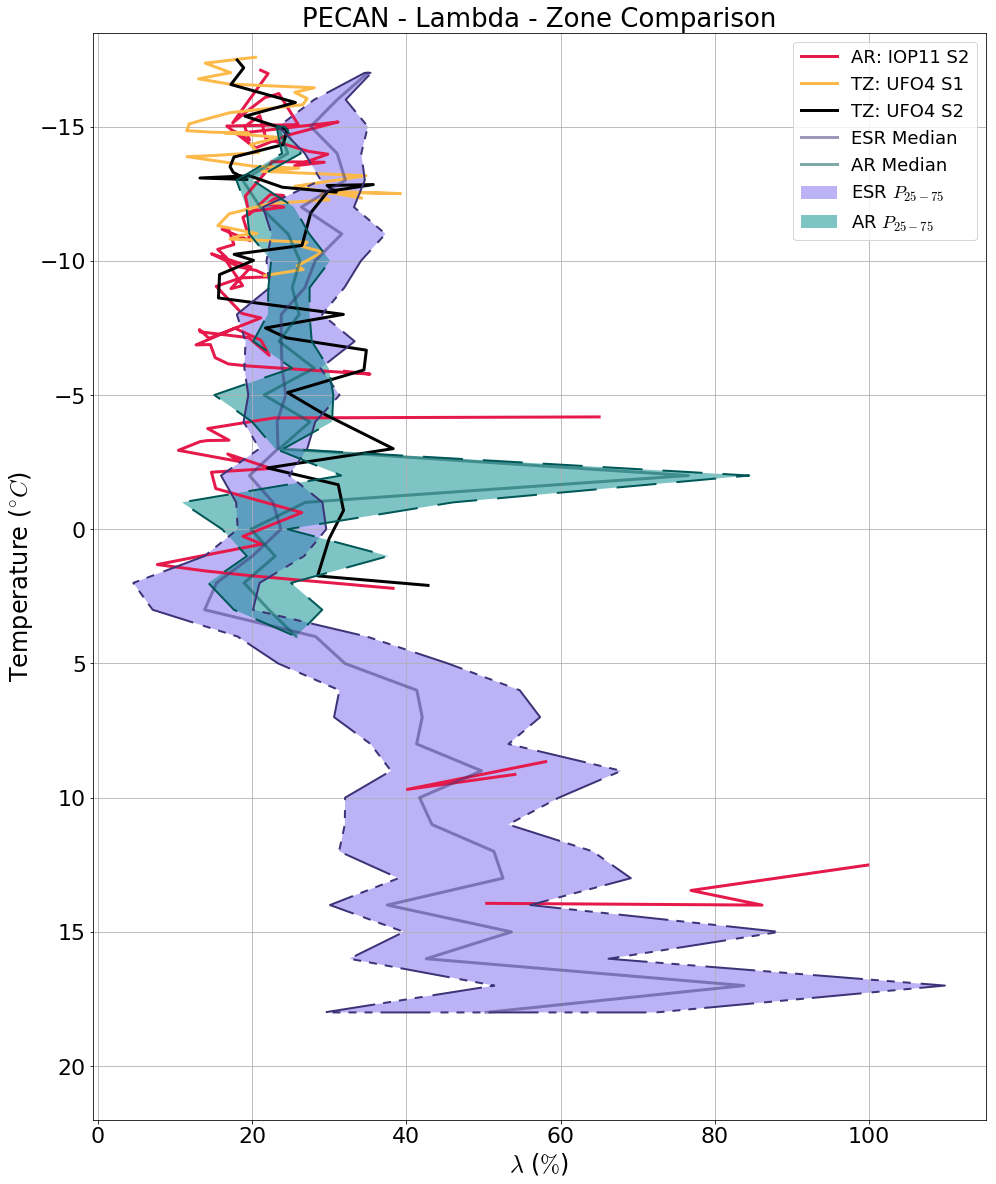

In [12]:
titleAppnd = ''
savePrpnd = ''

if plotRH:
    fig, ax = plt.subplots(figsize=(16,20))
    
    # Plot the spread fill and then plot just the outline of each spread
    #    (the alpha of the spread will affect the outline if done in the
    #    same fill_betweenx command)
    ax.plot(iop11S2['rh'],iop11S2['tempC'],color='#e6194b',linewidth=3,label='AR: IOP11 S2')
    
    if not plotTZsep:
        ax.fill_betweenx(bin_mid,binRH_25pct_TZ,binRH_75pct_TZ,
                         alpha=0.5,facecolor=tzFill,
                         edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
        ax.fill_betweenx(bin_mid,binRH_25pct_TZ,binRH_75pct_TZ,
                         facecolor='none',linestyle =(0.,[10,5]),
                         edgecolor=tzLine,linewidth=2,zorder=5)
    else:
        ax.plot(tzUFO4_S1['rh'],tzUFO4_S1['tempC'],color='#fdba4b',linewidth=3,label='TZ: UFO4 S1')
        ax.plot(tzUFO4_S2['rh'],tzUFO4_S2['tempC'],color='black',linewidth=3,label='TZ: UFO4 S2')
        
    ax.fill_betweenx(bin_mid,binRH_25pct_SR,binRH_75pct_SR,
                     alpha=0.5,facecolor=esrFill,
                     edgecolor='none',linewidth=0,label='ESR $P_{25-75}$')
    ax.fill_betweenx(bin_mid,binRH_25pct_SR,binRH_75pct_SR,
                     facecolor='none',linestyle =(0.,[25,5,4,4,4,4,4,4]),
                     edgecolor=esrLine,linewidth=2,zorder=5)
    
    
    ax.fill_betweenx(bin_mid,binRH_25pct_AR,binRH_75pct_AR,
                     alpha=0.5,facecolor=arFill,
                     edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
    ax.fill_betweenx(bin_mid,binRH_25pct_AR,binRH_75pct_AR,
                     facecolor='none',linestyle =(0.,[20,10]),
                     edgecolor=arLine,linewidth=2,zorder=5)
    
    # Plot medians
    if not plotTZsep:
        ax.plot(binRH_median_TZ,bin_mid,color=tzLine,alpha=0.5,linewidth=3,label='TZ Median')
    ax.plot(binRH_median_SR,bin_mid,color=esrLine,alpha=0.5,linewidth=3,label='ESR Median')
    ax.plot(binRH_median_AR,bin_mid,color=arLine,alpha=0.5,linewidth=3,label='AR Median')
    
    
    
    ax.invert_yaxis()
    ax.set_ylim(22,-18.5)
    ax.legend(loc='upper left',fontsize=18)
    ax.set_xlabel('Relative Humidity ($\%$)',fontsize=24)
    ax.set_ylabel('Temperature ($^{\circ}C$)',fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=22)
    ax.set_title('PECAN - RH - Zone Comparison{}'.format(titleAppnd),fontsize=26)
    ax.grid()
    # Save the output figure
    saveStr = '{}/{}ZoneCmp_RH.{}'.format(figSavePath,savePrpnd,fType)
    if noDispSave:
        fig.savefig(saveStr,bbox_inches='tight')
        plt.close(fig)

if plotNt:
    fig2, ax2 = plt.subplots(figsize=(16,20))
    
    ax2.plot(iop11S2['Nt'],iop11S2['tempC'],color='#e6194b',linewidth=3,label='AR: IOP11 S2')
    
    if not plotTZsep:
        ax2.fill_betweenx(bin_mid,binNt_25pct_TZ,binNt_75pct_TZ,
                         alpha=0.5,facecolor=tzFill,
                         edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
        ax2.fill_betweenx(bin_mid,binNt_25pct_TZ,binNt_75pct_TZ,
                         facecolor='none',linestyle =(0.,[10,5]),
                         edgecolor=tzLine,linewidth=2,zorder=5)
    else:
        ax2.plot(tzUFO4_S1['Nt'],tzUFO4_S1['tempC'],color='#fdba4b',linewidth=3,label='TZ: UFO4 S1')
        ax2.plot(tzUFO4_S2['Nt'],tzUFO4_S2['tempC'],color='black',linewidth=3,label='TZ: UFO4 S2')
    
    ax2.fill_betweenx(bin_mid,binNt_25pct_SR,binNt_75pct_SR,
                     alpha=0.5,facecolor=esrFill,
                     edgecolor='none',linewidth=0,label='ESR $P_{25-75}$')
    ax2.fill_betweenx(bin_mid,binNt_25pct_SR,binNt_75pct_SR,
                     facecolor='none',linestyle =(0.,[25,5,4,4,4,4,4,4]),
                     edgecolor=esrLine,linewidth=2,zorder=5)
    
    
    ax2.fill_betweenx(bin_mid,binNt_25pct_AR,binNt_75pct_AR,
                     alpha=0.5,facecolor=arFill,
                     edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
    ax2.fill_betweenx(bin_mid,binNt_25pct_AR,binNt_75pct_AR,
                     facecolor='none',linestyle =(0.,[20,10]),
                     edgecolor=arLine,linewidth=2,zorder=5)
    
    # Plot medians
    if not plotTZsep:
        ax2.plot(binNt_median_TZ,bin_mid,color=tzLine,alpha=0.5,linewidth=3,label='TZ Median')
    ax2.plot(binNt_median_SR,bin_mid,color=esrLine,alpha=0.5,linewidth=3,label='ESR Median')
    ax2.plot(binNt_median_AR,bin_mid,color=arLine,alpha=0.5,linewidth=3,label='AR Median')
        
    
    ax2.invert_yaxis()
    ax2.set_ylim(22,-18.5)
    ax2.set_xscale('log',nonposx='mask')
    ax2.legend(loc='upper left',fontsize=18)
    ax2.set_xlabel('Total Number Concentration ($cm^{-3}$)',fontsize=24)
    ax2.set_ylabel('Temperature ($^{\circ}C$)',fontsize=24)
    ax2.tick_params(axis='both', which='major', labelsize=22)
    ax2.set_title('PECAN - Nt - Zone Comparison{}'.format(titleAppnd),fontsize=26)
    ax2.grid()
    # Save the output figure
    saveStr2 = '{}/{}ZoneCmp_Nt.{}'.format(figSavePath,savePrpnd,fType)
    if noDispSave:
        fig2.savefig(saveStr2,bbox_inches='tight')
        plt.close(fig2)

if plotTWC:
    fig3, ax3 = plt.subplots(figsize=(16,20))
    
    ax3.plot(iop11S2['twc'],iop11S2['tempC'],color='#e6194b',linewidth=3,label='AR: IOP11 S2')
    
    if not plotTZsep:
        ax3.fill_betweenx(bin_mid,binTWC_25pct_TZ,binTWC_75pct_TZ,
                         alpha=0.5,facecolor=tzFill,
                         edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
        ax3.fill_betweenx(bin_mid,binTWC_25pct_TZ,binTWC_75pct_TZ,
                         facecolor='none',linestyle =(0.,[10,5]),
                         edgecolor=tzLine,linewidth=2,zorder=5)
    else:
        ax3.plot(tzUFO4_S1['twc'],tzUFO4_S1['tempC'],color='#fdba4b',linewidth=3,label='TZ: UFO4 S1')
        ax3.plot(tzUFO4_S2['twc'],tzUFO4_S2['tempC'],color='black',linewidth=3,label='TZ: UFO4 S2')
    
    ax3.fill_betweenx(bin_mid,binTWC_25pct_SR,binTWC_75pct_SR,
                     alpha=0.5,facecolor=esrFill,
                     edgecolor='none',linewidth=0,label='ESR $P_{25-75}$')
    ax3.fill_betweenx(bin_mid,binTWC_25pct_SR,binTWC_75pct_SR,
                     facecolor='none',linestyle =(0.,[25,5,4,4,4,4,4,4]),
                     edgecolor=esrLine,linewidth=2,zorder=5)
    
    
    ax3.fill_betweenx(bin_mid,binTWC_25pct_AR,binTWC_75pct_AR,
                     alpha=0.5,facecolor=arFill,
                     edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
    ax3.fill_betweenx(bin_mid,binTWC_25pct_AR,binTWC_75pct_AR,
                     facecolor='none',linestyle =(0.,[20,10]),
                     edgecolor=arLine,linewidth=2,zorder=5)
    
    # Plot medians
    if not plotTZsep:
        ax3.plot(binTWC_median_TZ,bin_mid,color=tzLine,alpha=0.5,linewidth=3,label='TZ Median')
    ax3.plot(binTWC_median_SR,bin_mid,color=esrLine,alpha=0.5,linewidth=3,label='ESR Median')
    ax3.plot(binTWC_median_AR,bin_mid,color=arLine,alpha=0.5,linewidth=3,label='AR Median')
        
    
    
    ax3.invert_yaxis()
    ax3.set_ylim(22,-18.5)
    ax3.set_xscale('log',nonposx='mask')
    ax3.legend(loc='upper left',fontsize=18)
    ax3.set_xlabel('Total Water Content ($g\ m^{-3}$)',fontsize=24)
    ax3.set_ylabel('Temperature ($^{\circ}C$)',fontsize=24)
    ax3.tick_params(axis='both', which='major', labelsize=22)
    ax3.set_title('PECAN - TWC - Zone Comparison{}'.format(titleAppnd),fontsize=26)
    ax3.grid()
    # Save the output figure
    saveStr3 = '{}/{}ZoneCmp_TWC.{}'.format(figSavePath,savePrpnd,fType)
    if noDispSave:
        fig3.savefig(saveStr3,bbox_inches='tight')
        plt.close(fig3)

if plotDmm:
    fig4, ax4 = plt.subplots(figsize=(16,20))
    
    ax4.plot(iop11S2['Dmm'],iop11S2['tempC'],color='#e6194b',linewidth=3,label='AR: IOP11 S2')
    
    if not plotTZsep:
        ax4.fill_betweenx(bin_mid,binDmm_25pct_TZ,binDmm_75pct_TZ,
                         alpha=0.5,facecolor=tzFill,
                         edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
        ax4.fill_betweenx(bin_mid,binDmm_25pct_TZ,binDmm_75pct_TZ,
                         facecolor='none',linestyle =(0.,[10,5]),
                         edgecolor=tzLine,linewidth=2,zorder=5)
    else:
        ax4.plot(tzUFO4_S1['Dmm'],tzUFO4_S1['tempC'],color='#fdba4b',linewidth=3,label='TZ: UFO4 S1')
        ax4.plot(tzUFO4_S2['Dmm'],tzUFO4_S2['tempC'],color='black',linewidth=3,label='TZ: UFO4 S2')
    
    ax4.fill_betweenx(bin_mid,binDmm_25pct_SR,binDmm_75pct_SR,
                     alpha=0.5,facecolor=esrFill,
                     edgecolor='none',linewidth=0,label='ESR $P_{25-75}$')
    ax4.fill_betweenx(bin_mid,binDmm_25pct_SR,binDmm_75pct_SR,
                     facecolor='none',linestyle =(0.,[25,5,4,4,4,4,4,4]),
                     edgecolor=esrLine,linewidth=2,zorder=5)
    
    
    ax4.fill_betweenx(bin_mid,binDmm_25pct_AR,binDmm_75pct_AR,
                     alpha=0.5,facecolor=arFill,
                     edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
    ax4.fill_betweenx(bin_mid,binDmm_25pct_AR,binDmm_75pct_AR,
                     facecolor='none',linestyle =(0.,[20,10]),
                     edgecolor=arLine,linewidth=2,zorder=5)
    
    # Plot medians
    if not plotTZsep:
        ax4.plot(binDmm_median_TZ,bin_mid,color=tzLine,alpha=0.5,linewidth=3,label='TZ Median')
    ax4.plot(binDmm_median_SR,bin_mid,color=esrLine,alpha=0.5,linewidth=3,label='ESR Median')
    ax4.plot(binDmm_median_AR,bin_mid,color=arLine,alpha=0.5,linewidth=3,label='AR Median')
        
    
    ax4.invert_yaxis()
    ax4.set_ylim(22,-18.5)
    ax4.legend(loc='upper right',fontsize=18)
    ax4.set_xlabel('Median Mass Diameter ($mm$)',fontsize=24)
    ax4.set_ylabel('Temperature ($^{\circ}C$)',fontsize=24)
    ax4.tick_params(axis='both', which='major', labelsize=22)
    ax4.set_title('PECAN - Dmm - Zone Comparison{}'.format(titleAppnd),fontsize=26)
    ax4.grid()
    # Save the output figure
    saveStr4 = '{}/{}ZoneCmp_Dmm.{}'.format(figSavePath,savePrpnd,fType)
    if noDispSave:
        fig4.savefig(saveStr4,bbox_inches='tight')
        plt.close(fig4)

if plotARat:
    fig5, ax5 = plt.subplots(figsize=(16,20))
    
    ax5.plot(iop11S2['ar']*100,iop11S2['tempC'],color='#e6194b',linewidth=3,label='AR: IOP11 S2')
    
    if not plotTZsep:
        ax5.fill_betweenx(bin_mid,binARat_25pct_TZ*100,binARat_75pct_TZ*100,
                         alpha=0.5,facecolor=tzFill,
                         edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
        ax5.fill_betweenx(bin_mid,binARat_25pct_TZ*100,binARat_75pct_TZ*100,
                         facecolor='none',linestyle =(0.,[10,5]),
                         edgecolor=tzLine,linewidth=2,zorder=5)
    else:
        ax5.plot(tzUFO4_S1['ar']*100,tzUFO4_S1['tempC'],color='#fdba4b',linewidth=3,label='TZ: UFO4 S1')
        ax5.plot(tzUFO4_S2['ar']*100,tzUFO4_S2['tempC'],color='black',linewidth=3,label='TZ: UFO4 S2')
    
    ax5.fill_betweenx(bin_mid,binARat_25pct_SR*100,binARat_75pct_SR*100,
                     alpha=0.5,facecolor=esrFill,
                     edgecolor='none',linewidth=0,label='ESR $P_{25-75}$')
    ax5.fill_betweenx(bin_mid,binARat_25pct_SR*100,binARat_75pct_SR*100,
                     facecolor='none',linestyle =(0.,[25,5,4,4,4,4,4,4]),
                     edgecolor=esrLine,linewidth=2,zorder=5)
    
    
    ax5.fill_betweenx(bin_mid,binARat_25pct_AR*100,binARat_75pct_AR*100,
                     alpha=0.5,facecolor=arFill,
                     edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
    ax5.fill_betweenx(bin_mid,binARat_25pct_AR*100,binARat_75pct_AR*100,
                     facecolor='none',linestyle =(0.,[20,10]),
                     edgecolor=arLine,linewidth=2,zorder=5)
    
    # Plot medians
    if not plotTZsep:
        ax5.plot(binARat_median_TZ*100,bin_mid,color=tzLine,alpha=0.5,linewidth=3,label='TZ Median')
    ax5.plot(binARat_median_SR*100,bin_mid,color=esrLine,alpha=0.5,linewidth=3,label='ESR Median')
    ax5.plot(binARat_median_AR*100,bin_mid,color=arLine,alpha=0.5,linewidth=3,label='AR Median')
        
    
    ax5.invert_yaxis()
    ax5.set_ylim(22,-18.5)
    ax5.legend(loc='upper right',fontsize=18)
    ax5.set_xlabel('Area Ratio ($\%$)',fontsize=24)
    ax5.set_ylabel('Temperature ($^{\circ}C$)',fontsize=24)
    ax5.tick_params(axis='both', which='major', labelsize=22)
    ax5.set_title('PECAN - Area Ratio - Zone Comparison{}'.format(titleAppnd),fontsize=26)
    ax5.grid()
    # Save the output figure
    saveStr5 = '{}/{}ZoneCmp_ARatio.{}'.format(figSavePath,savePrpnd,fType)
    if noDispSave:
        fig5.savefig(saveStr5,bbox_inches='tight')
        plt.close(fig5)

if plotRE:
    fig6, ax6 = plt.subplots(figsize=(16,20))
    
    if not plotTZsep:
        ax6.fill_betweenx(bin_mid,binRE_25pct_TZ,binRE_75pct_TZ,
                         alpha=0.5,facecolor=tzFill,
                         edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
        ax6.fill_betweenx(bin_mid,binRE_25pct_TZ,binRE_75pct_TZ,
                         facecolor='none',linestyle =(0.,[10,5]),
                         edgecolor=tzLine,linewidth=2,zorder=5)
    
    ax6.fill_betweenx(bin_mid,binRE_25pct_SR,binRE_75pct_SR,
                     alpha=0.5,facecolor=esrFill,
                     edgecolor='none',linewidth=0,label='ESR $P_{25-75}$')
    ax6.fill_betweenx(bin_mid,binRE_25pct_SR,binRE_75pct_SR,
                     facecolor='none',linestyle =(0.,[25,5,4,4,4,4,4,4]),
                     edgecolor=esrLine,linewidth=2,zorder=5)
    
    ax6.plot(iop11S2['re'],iop11S2['tempC'],color='#e6194b',linewidth=3,label='AR: IOP11 S2')
    ax6.fill_betweenx(bin_mid,binRE_25pct_AR,binRE_75pct_AR,
                     alpha=0.5,facecolor=arFill,
                     edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
    ax6.fill_betweenx(bin_mid,binRE_25pct_AR,binRE_75pct_AR,
                     facecolor='none',linestyle =(0.,[20,10]),
                     edgecolor=arLine,linewidth=2,zorder=5)
    
    # Plot medians
    if not plotTZsep:
        ax6.plot(binRE_median_TZ,bin_mid,color=tzLine,alpha=0.5,linewidth=3,label='TZ Median')
    ax6.plot(binRE_median_SR,bin_mid,color=esrLine,alpha=0.5,linewidth=3,label='ESR Median')
    ax6.plot(binRE_median_AR,bin_mid,color=arLine,alpha=0.5,linewidth=3,label='AR Median')
    if plotTZsep:
        ax6.plot(tzUFO4_S1['re'],tzUFO4_S1['tempC'],color='#fdba4b',linewidth=3,label='TZ: UFO4 S1')
        ax6.plot(tzUFO4_S2['re'],tzUFO4_S2['tempC'],color='black',linewidth=3,label='TZ: UFO4 S2')
    
    
    ax6.invert_yaxis()
    ax6.set_ylim(22,-18.5)
    ax6.legend(loc='upper left',fontsize=18)
    ax6.set_xlabel('Effective Radius ($mm$)',fontsize=24)
    ax6.set_ylabel('Temperature ($^{\circ}C$)',fontsize=24)
    ax6.tick_params(axis='both', which='major', labelsize=22)
    ax6.set_title('PECAN - $R_e$ - Zone Comparison{}'.format(titleAppnd),fontsize=26)
    ax6.grid()
    # Save the output figure
    saveStr6 = '{}/{}ZoneCmp_RE.{}'.format(figSavePath,savePrpnd,fType)
    if noDispSave:
        fig6.savefig(saveStr6,bbox_inches='tight')
        plt.close(fig6)

if plotRjcR:
    fig7, ax7 = plt.subplots(figsize=(16,20))
    
    if not plotTZsep:
        ax7.fill_betweenx(bin_mid,binRjcR_25pct_TZ,binRjcR_75pct_TZ,
                         alpha=0.5,facecolor=tzFill,
                         edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
        ax7.fill_betweenx(bin_mid,binRjcR_25pct_TZ,binRjcR_75pct_TZ,
                         facecolor='none',linestyle =(0.,[10,5]),
                         edgecolor=tzLine,linewidth=2,zorder=5)
    
    ax7.fill_betweenx(bin_mid,binRjcR_25pct_SR,binRjcR_75pct_SR,
                     alpha=0.5,facecolor=esrFill,
                     edgecolor='none',linewidth=0,label='ESR $P_{25-75}$')
    ax7.fill_betweenx(bin_mid,binRjcR_25pct_SR,binRjcR_75pct_SR,
                     facecolor='none',linestyle =(0.,[25,5,4,4,4,4,4,4]),
                     edgecolor=esrLine,linewidth=2,zorder=5)
    
    ax7.plot(iop11S2['rjctRatio'],iop11S2['tempC'],color='#e6194b',linewidth=3,label='AR: IOP11 S2')
    ax7.fill_betweenx(bin_mid,binRjcR_25pct_AR,binRjcR_75pct_AR,
                     alpha=0.5,facecolor=arFill,
                     edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
    ax7.fill_betweenx(bin_mid,binRjcR_25pct_AR,binRjcR_75pct_AR,
                     facecolor='none',linestyle =(0.,[20,10]),
                     edgecolor=arLine,linewidth=2,zorder=5)
    
    # Plot medians
    if not plotTZsep:
        ax7.plot(binRjcR_median_TZ,bin_mid,color=tzLine,alpha=0.5,linewidth=3,label='TZ Median')
    ax7.plot(binRjcR_median_SR,bin_mid,color=esrLine,alpha=0.5,linewidth=3,label='ESR Median')
    ax7.plot(binRjcR_median_AR,bin_mid,color=arLine,alpha=0.5,linewidth=3,label='AR Median')
    if plotTZsep:
        ax7.plot(tzUFO4_S1['rjctRatio'],tzUFO4_S1['tempC'],color='#fdba4b',linewidth=3,label='TZ: UFO4 S1')
        ax7.plot(tzUFO4_S2['rjctRatio'],tzUFO4_S2['tempC'],color='black',linewidth=3,label='TZ: UFO4 S2')
    
    
    ax7.invert_yaxis()
    ax7.set_ylim(22,-18.5)
    ax7.legend(loc='upper right',fontsize=18)
    ax7.set_xlabel('Reject Ratio ($\%$)',fontsize=24)
    ax7.set_ylabel('Temperature ($^{\circ}C$)',fontsize=24)
    ax7.tick_params(axis='both', which='major', labelsize=22)
    ax7.set_title('PECAN - Reject Ratio - Zone Comparison{}'.format(titleAppnd),fontsize=26)
    ax7.grid()
    # Save the output figure
    saveStr7 = '{}/{}ZoneCmp_RjcR.{}'.format(figSavePath,savePrpnd,fType)
    if noDispSave:
        fig7.savefig(saveStr7,bbox_inches='tight')
        plt.close(fig7)
        
  

if plotLmda:
    fig8, ax8 = plt.subplots(figsize=(16,20))
    
    # Plot the spread fill and then plot just the outline of each spread
    #    (the alpha of the spread will affect the outline if done in the
    #    same fill_betweenx command)
    ax8.plot(iop11S2['lmda'],iop11S2['tempC'],color='#e6194b',linewidth=3,label='AR: IOP11 S2')
    
    if not plotTZsep:
        ax8.fill_betweenx(bin_mid,binLmda_25pct_TZ,binLmda_75pct_TZ,
                        alpha=0.5,facecolor=tzFill,
                        edgecolor='none',linewidth=0,label='TZ $P_{25-75}$')
        ax8.fill_betweenx(bin_mid,binLmda_25pct_TZ,binLmda_75pct_TZ,
                        facecolor='none',linestyle =(0.,[10,5]),
                        edgecolor=tzLine,linewidth=2,zorder=5)
    else:
        ax8.plot(tzUFO4_S1['lmda'],tzUFO4_S1['tempC'],color='#fdba4b',linewidth=3,label='TZ: UFO4 S1')
        ax8.plot(tzUFO4_S2['lmda'],tzUFO4_S2['tempC'],color='black',linewidth=3,label='TZ: UFO4 S2')
        
    ax8.fill_betweenx(bin_mid,binLmda_25pct_SR,binLmda_75pct_SR,
                     alpha=0.5,facecolor=esrFill,
                     edgecolor='none',linewidth=0,label='ESR $P_{25-75}$')
    ax8.fill_betweenx(bin_mid,binLmda_25pct_SR,binLmda_75pct_SR,
                     facecolor='none',linestyle =(0.,[25,5,4,4,4,4,4,4]),
                     edgecolor=esrLine,linewidth=2,zorder=5)
    
    
    ax8.fill_betweenx(bin_mid,binLmda_25pct_AR,binLmda_75pct_AR,
                     alpha=0.5,facecolor=arFill,
                     edgecolor='none',linewidth=0,label='AR $P_{25-75}$')
    ax8.fill_betweenx(bin_mid,binLmda_25pct_AR,binLmda_75pct_AR,
                     facecolor='none',linestyle =(0.,[20,10]),
                     edgecolor=arLine,linewidth=2,zorder=5)
    
    # Plot medians
    if not plotTZsep:
        ax8.plot(binLmda_median_TZ,bin_mid,color=tzLine,alpha=0.5,linewidth=3,label='TZ Median')
    ax8.plot(binLmda_median_SR,bin_mid,color=esrLine,alpha=0.5,linewidth=3,label='ESR Median')
    ax8.plot(binLmda_median_AR,bin_mid,color=arLine,alpha=0.5,linewidth=3,label='AR Median')
    
    
    
    ax8.invert_yaxis()
    ax8.set_ylim(22,-18.5)
    ax8.legend(loc='upper right',fontsize=18)
    ax8.set_xlabel('$\lambda$ ($\%$)',fontsize=24)
    ax8.set_ylabel('Temperature ($^{\circ}C$)',fontsize=24)
    ax8.tick_params(axis='both', which='major', labelsize=22)
    ax8.set_title('PECAN - Lambda - Zone Comparison{}'.format(titleAppnd),fontsize=26)
    ax8.grid()
    # Save the output figure
    saveStr = '{}/{}ZoneCmp_Lmda.{}'.format(figSavePath,savePrpnd,fType)
    if noDispSave:
        fig8.savefig(saveStr,bbox_inches='tight')
        plt.close(fig8)

In [25]:
fig8, ax8 = plt.subplots(figsize=(16,20))

# Plot the spread fill and then plot just the outline of each spread
#    (the alpha of the spread will affect the outline if done in the
#    same fill_betweenx command)

ax8.scatter(tzUFO4_S1['lmda'],tzUFO4_S1['tempC'],color='black',linewidth=1,edgecolors=None,label='TZ: UFO4 S1',s=50)
ax8.scatter(tzUFO4_S2['lmda'],tzUFO4_S2['tempC'],color='b',linewidth=1,edgecolors=None,label='TZ: UFO4 S2',s=50)


ax8.invert_yaxis()
ax8.set_ylim(22,-18.5)
ax8.legend(loc='upper right',fontsize=18)
ax8.set_xlabel('$\lambda$ ($\%$)',fontsize=24)
ax8.set_ylabel('Temperature ($^{\circ}C$)',fontsize=24)
ax8.tick_params(axis='both', which='major', labelsize=22)
ax8.set_title('PECAN - Lambda - Zone Comparison{}'.format(titleAppnd),fontsize=26)
ax8.grid()
# Save the output figure
saveStr = '{}/{}TZ_Lmda.{}'.format(figSavePath,savePrpnd,fType)
if noDispSave:
    fig8.savefig(saveStr,bbox_inches='tight')
    plt.close(fig8)

In [24]:
fig8, ax8 = plt.subplots(figsize=(16,20))

# Plot the spread fill and then plot just the outline of each spread
#    (the alpha of the spread will affect the outline if done in the
#    same fill_betweenx command)

ax8.scatter(sr['lmda'],sr['tempC'],color='b',linewidth=1,edgecolors=None,label='ESR',s=50)


ax8.invert_yaxis()
ax8.set_ylim(22,-18.5)
ax8.legend(loc='upper right',fontsize=18)
ax8.set_xlabel('$\lambda$ ($\%$)',fontsize=24)
ax8.set_ylabel('Temperature ($^{\circ}C$)',fontsize=24)
ax8.tick_params(axis='both', which='major', labelsize=22)
ax8.set_title('PECAN - Lambda - Zone Comparison{}'.format(titleAppnd),fontsize=26)
ax8.grid()
# Save the output figure
saveStr = '{}/{}ESR_Lmda.{}'.format(figSavePath,savePrpnd,fType)
if noDispSave:
    fig8.savefig(saveStr,bbox_inches='tight')
    plt.close(fig8)

In [23]:
fig8, ax8 = plt.subplots(figsize=(16,20))

# Plot the spread fill and then plot just the outline of each spread
#    (the alpha of the spread will affect the outline if done in the
#    same fill_betweenx command)

ax8.scatter(ar['lmda'],ar['tempC'],color='g',linewidth=1,edgecolors=None,label='AR',s=50)
ax8.scatter(iop11S2['lmda'],iop11S2['tempC'],color='m',linewidth=1,edgecolors=None,label='AR: IOP11 S2',s=50)

ax8.invert_yaxis()
ax8.set_ylim(22,-18.5)
ax8.legend(loc='upper right',fontsize=18)
ax8.set_xlabel('$\lambda$ ($\%$)',fontsize=24)
ax8.set_ylabel('Temperature ($^{\circ}C$)',fontsize=24)
ax8.tick_params(axis='both', which='major', labelsize=22)
ax8.set_title('PECAN - Lambda - Zone Comparison{}'.format(titleAppnd),fontsize=26)
ax8.grid()
# Save the output figure
saveStr = '{}/{}AR_Lmda.{}'.format(figSavePath,savePrpnd,fType)
if noDispSave:
    fig8.savefig(saveStr,bbox_inches='tight')
    plt.close(fig8)